# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [Link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [Here](https://github.com/jasonszz/MLAI-2023/blob/main/Module_17_Practical_Application_3/CRISP-DM-BANK.pdf) for more information on the data and features.



# Business Understanding

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- According to **Materials and Methods** section of the paper [Here](https://github.com/jasonszz/MLAI-2023/blob/main/Module_17_Practical_Application_3/CRISP-DM-BANK.pdf), this dataset collected is related to total 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79,354 contacts made.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

## Exploratory Data Analysis (EDA)

In [1]:
# Import basic libraries for EDA (for reading DataFrame) and Visualization (for displaying plots)

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Read the data

df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
# View the data

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- Converted Columns name 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', and 'nr.employed' for coding attributes purpose

In [4]:
# Rename column name for coding attributes purpose

df = df.rename(columns = {
    'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 
    'cons.conf.idx':'cons_conf_idx', 'nr.employed':'nr_employed',
    'y':'subscribe'
})

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



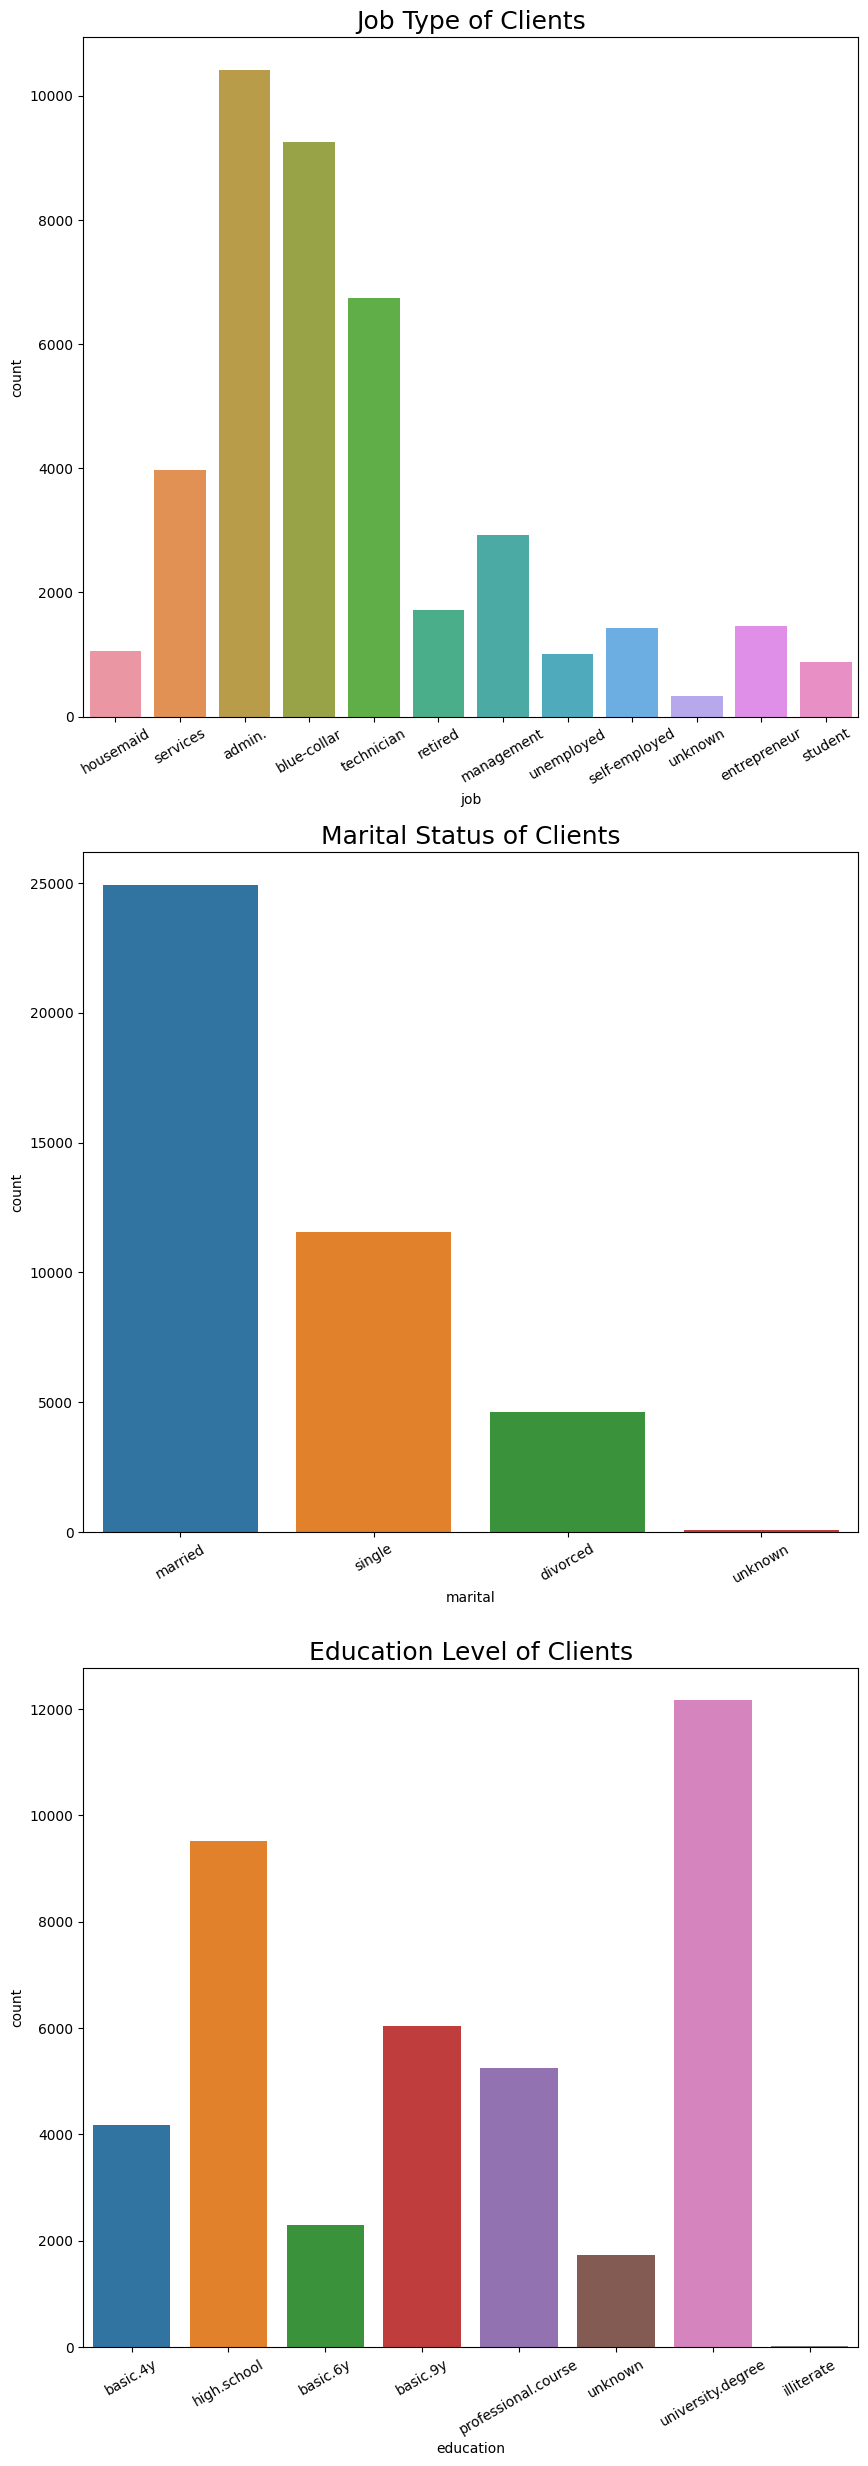

In [5]:
# Create countplot subplot for categorical columns 'job', 'marital', and 'education' for visualization purpose

fig, axs = plt.subplots(3, figsize = (10, 30))

sns.countplot(x = df['job'], ax = axs[0])
sns.countplot(x = df['marital'], ax = axs[1])
sns.countplot(x = df['education'], ax = axs[2])

axs[0].set_title('Job Type of Clients', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Marital Status of Clients', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Education Level of Clients', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Job_Marital_Education.png')

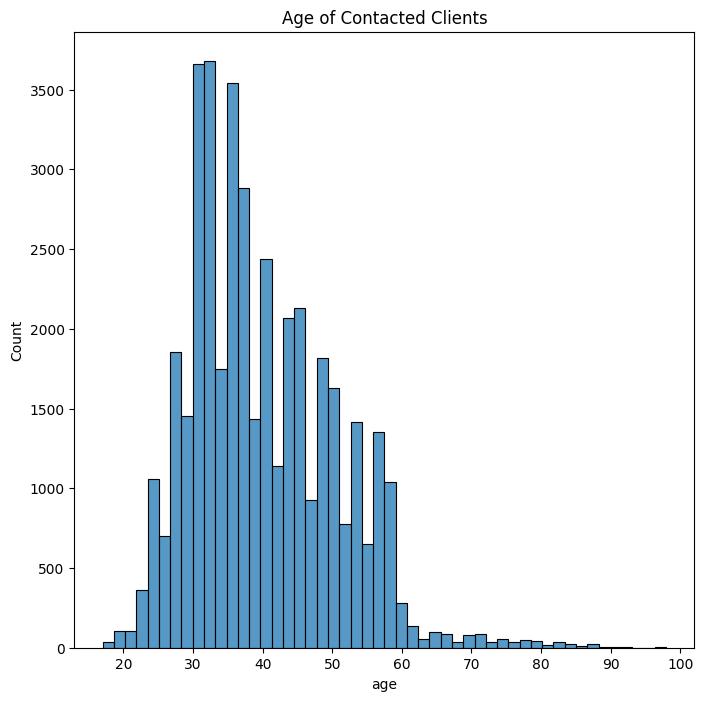

In [6]:
# Get a general idea of age of contacted clients (for visualization purpose)

plt.figure(figsize = (8, 8))
sns.histplot(df['age'], bins = 50)
plt.title('Age of Contacted Clients')

# Save a copy of plot image
plt.savefig('images/Histograms plot of Age of Contacted Clients.png')

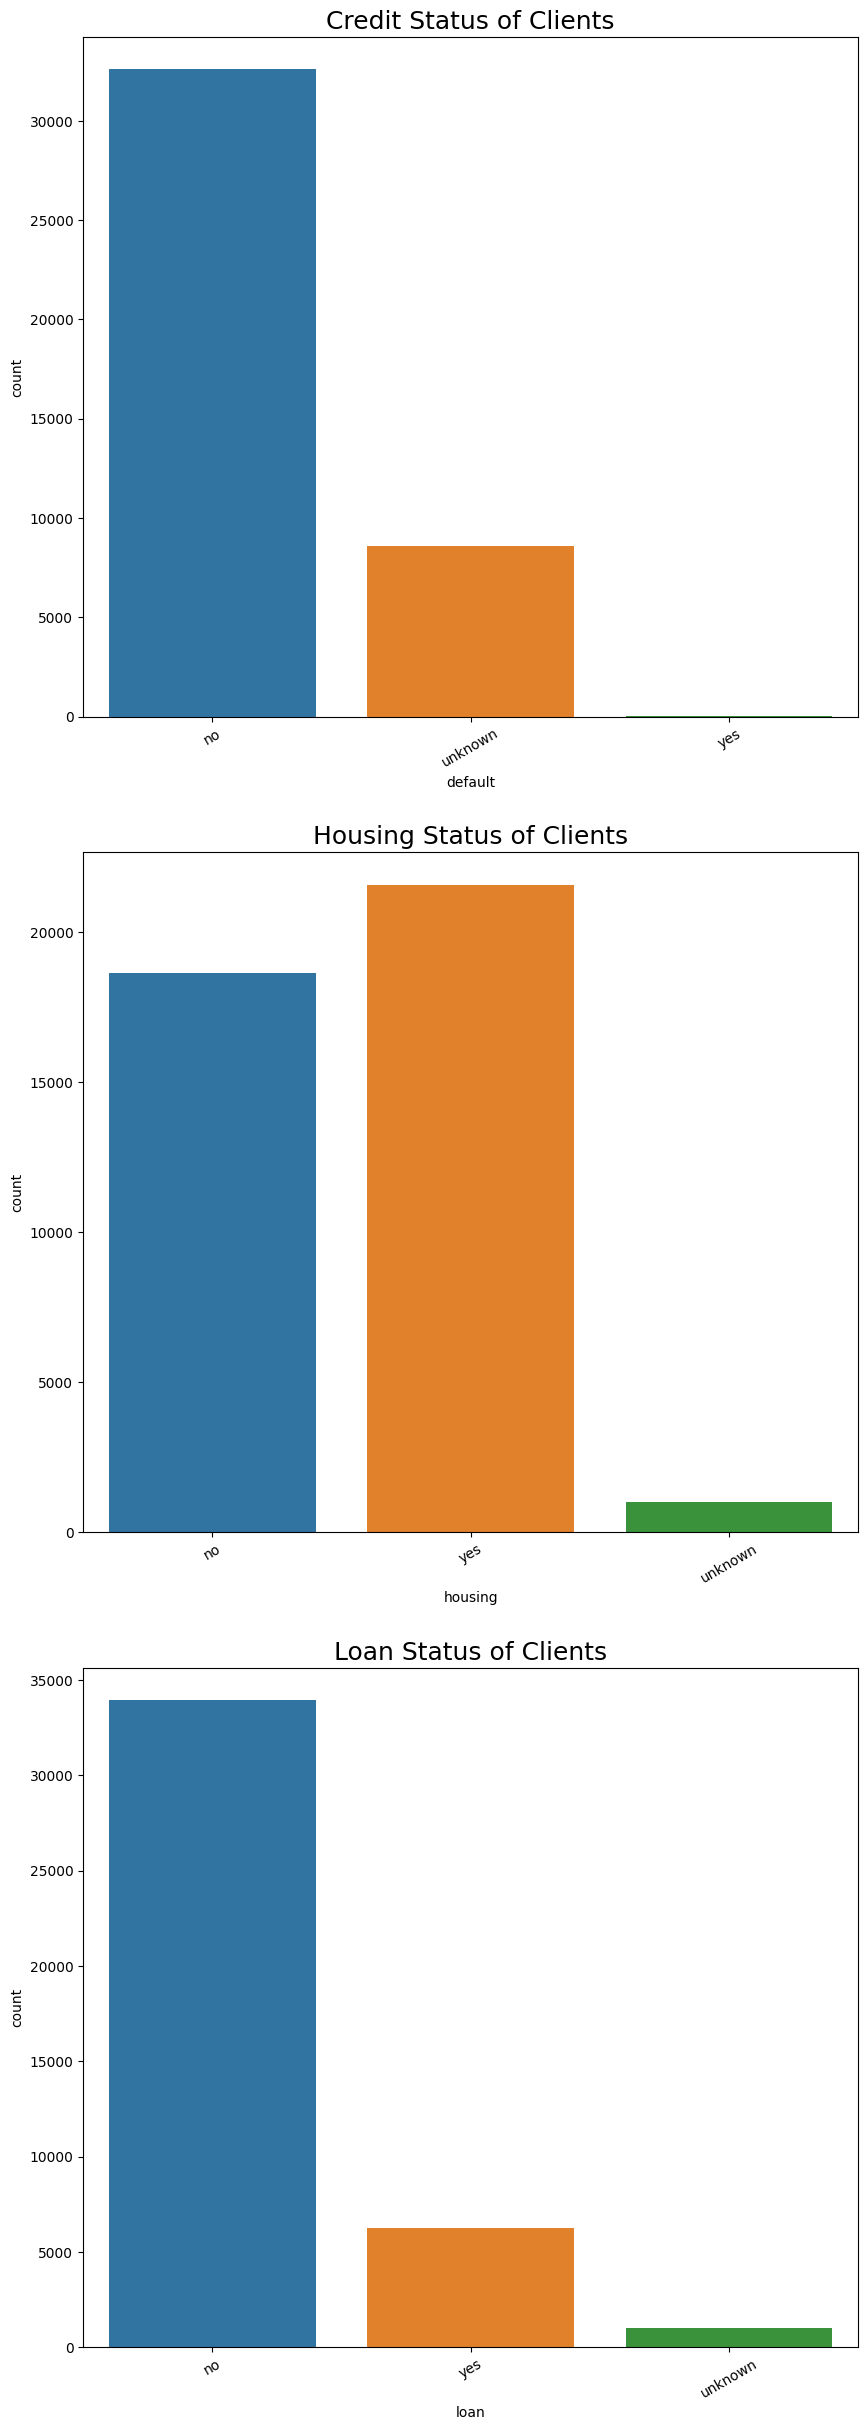

In [7]:
# Create countplot subplot for categorical columns 'default', 'housing', and 'loan' for visualization purpose

fig, axs = plt.subplots(3, figsize = (10, 30))

sns.countplot(x = df['default'], ax = axs[0])
sns.countplot(x = df['housing'], ax = axs[1])
sns.countplot(x = df['loan'], ax = axs[2])

axs[0].set_title('Credit Status of Clients', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Housing Status of Clients', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Loan Status of Clients', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Default(Credit)_Housing_Loan.png')

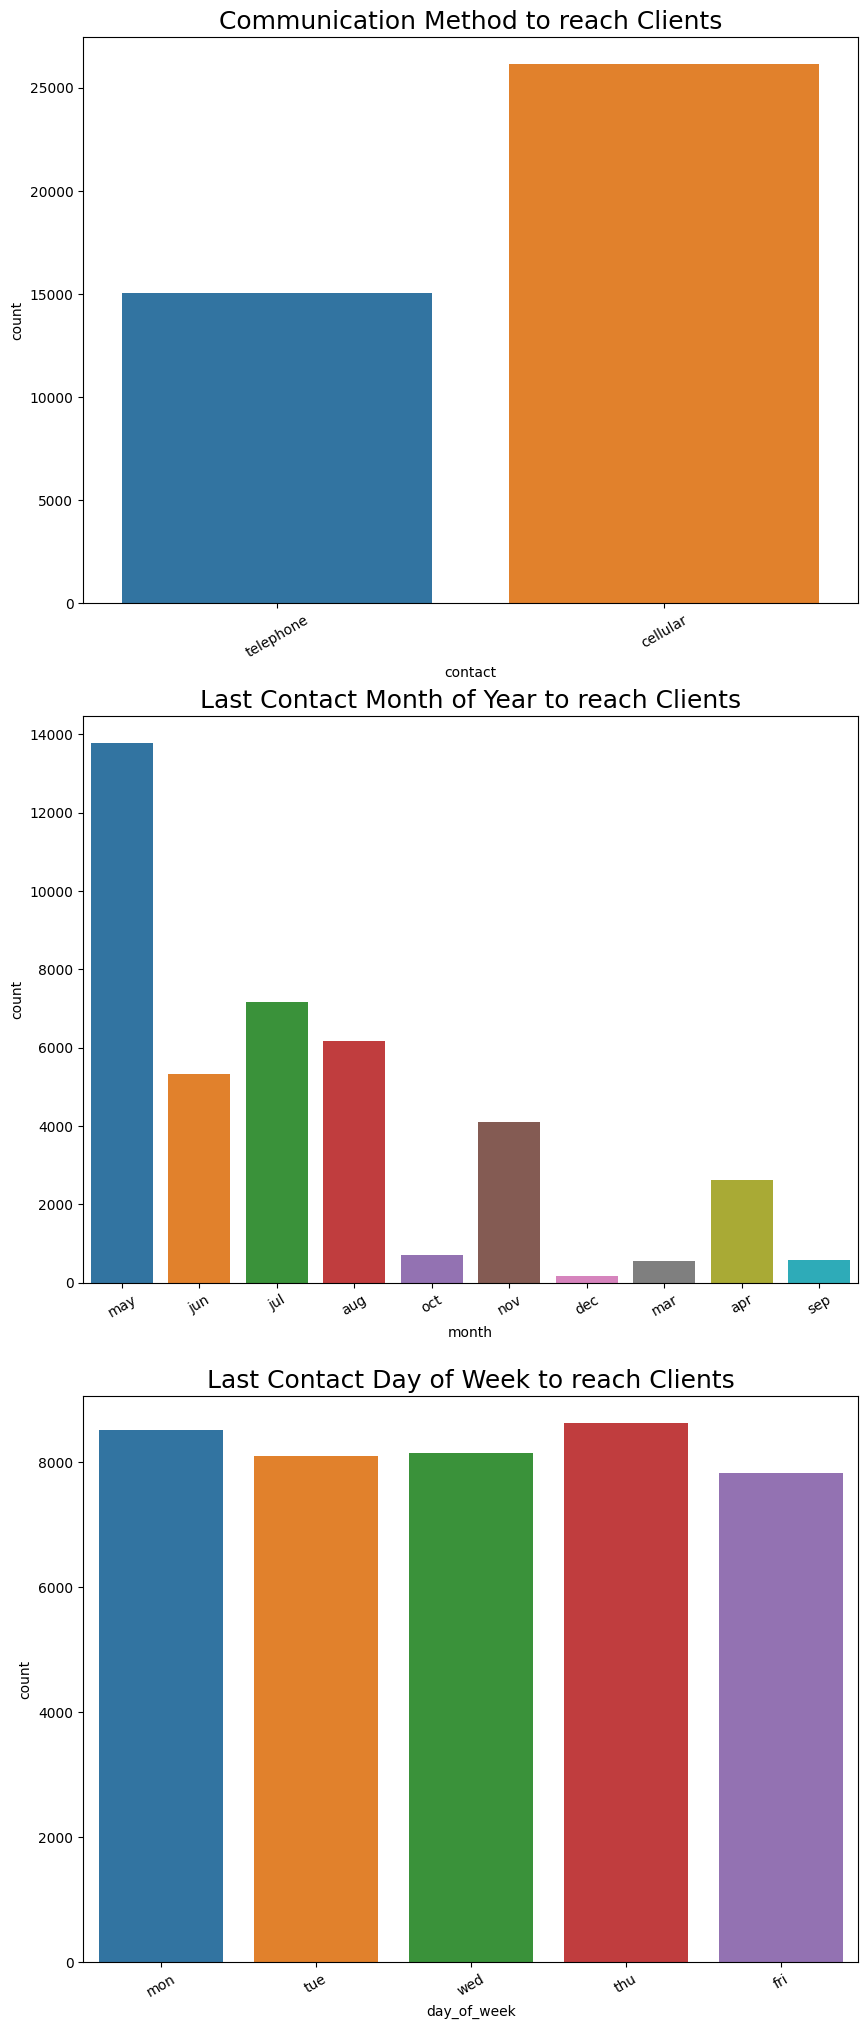

In [8]:
# Create countplot subplot for categorical columns 'contact', 'month', and 'day_of_week' for visualization purpose

fig, axs = plt.subplots(3, figsize = (10, 25))

sns.countplot(x = df['contact'], ax = axs[0])
sns.countplot(x = df['month'], ax = axs[1])
sns.countplot(x = df['day_of_week'], ax = axs[2])

axs[0].set_title('Communication Method to reach Clients', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Last Contact Month of Year to reach Clients', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Last Contact Day of Week to reach Clients', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Contact_Month_Day_of_Week.png')

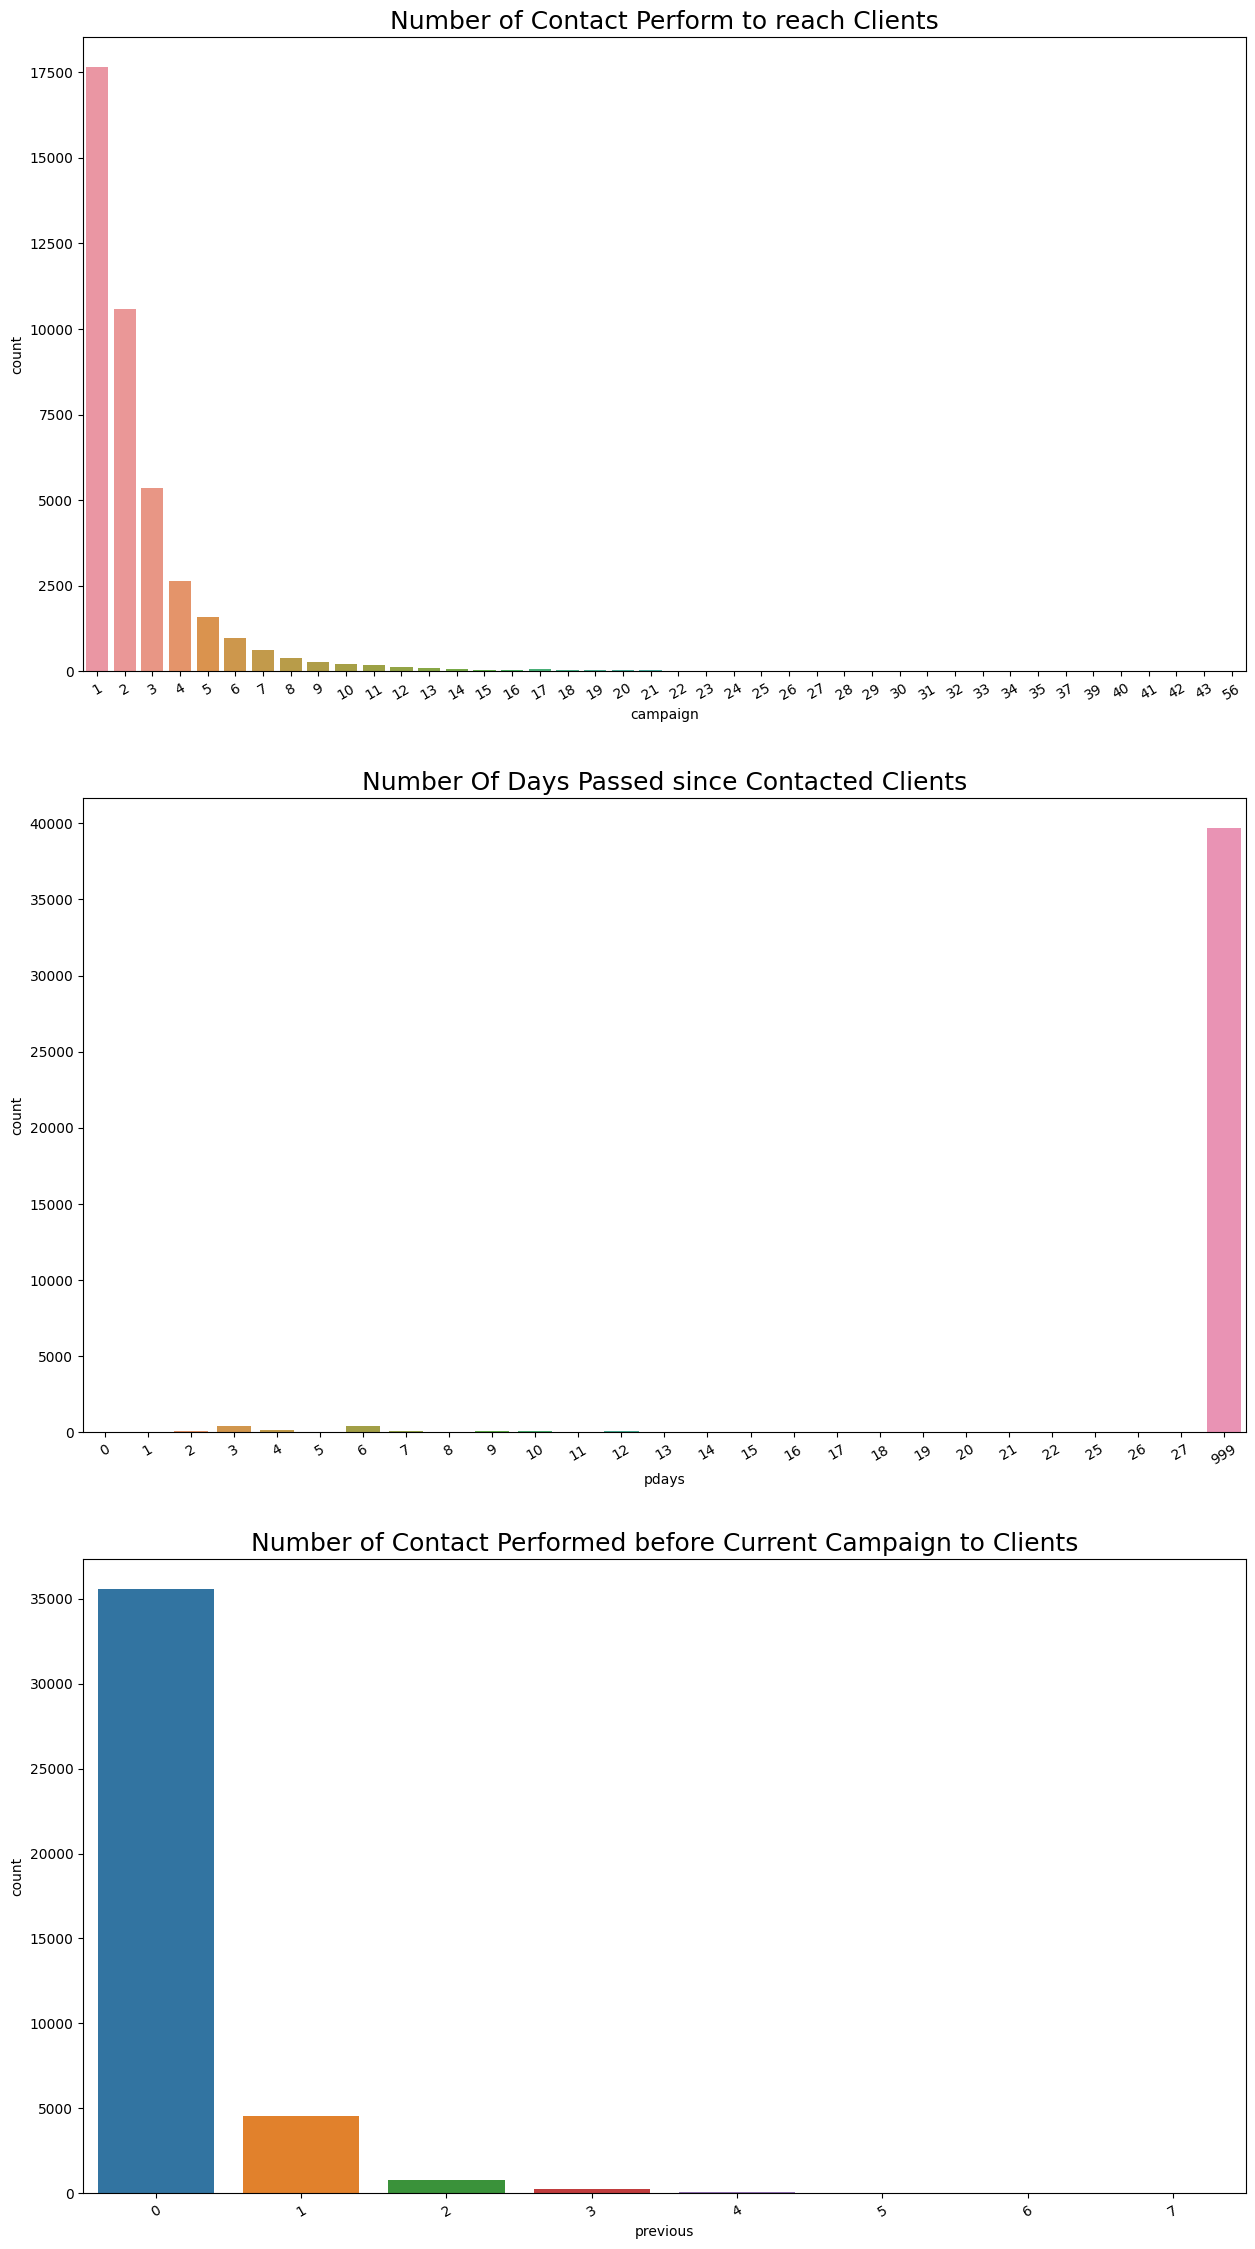

In [9]:
# Create countplot subplot for categorical columns 'pdays', 'month', and 'previous' for visualization purpose

fig, axs = plt.subplots(3, figsize = (15, 28))

sns.countplot(x = df['campaign'], ax = axs[0])
sns.countplot(x = df['pdays'], ax = axs[1])
sns.countplot(x = df['previous'], ax = axs[2])

axs[0].set_title('Number of Contact Perform to reach Clients', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Number Of Days Passed since Contacted Clients', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Number of Contact Performed before Current Campaign to Clients', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Campaign_Day_Passed_since_Contact_Previous_Contact_Try.png')

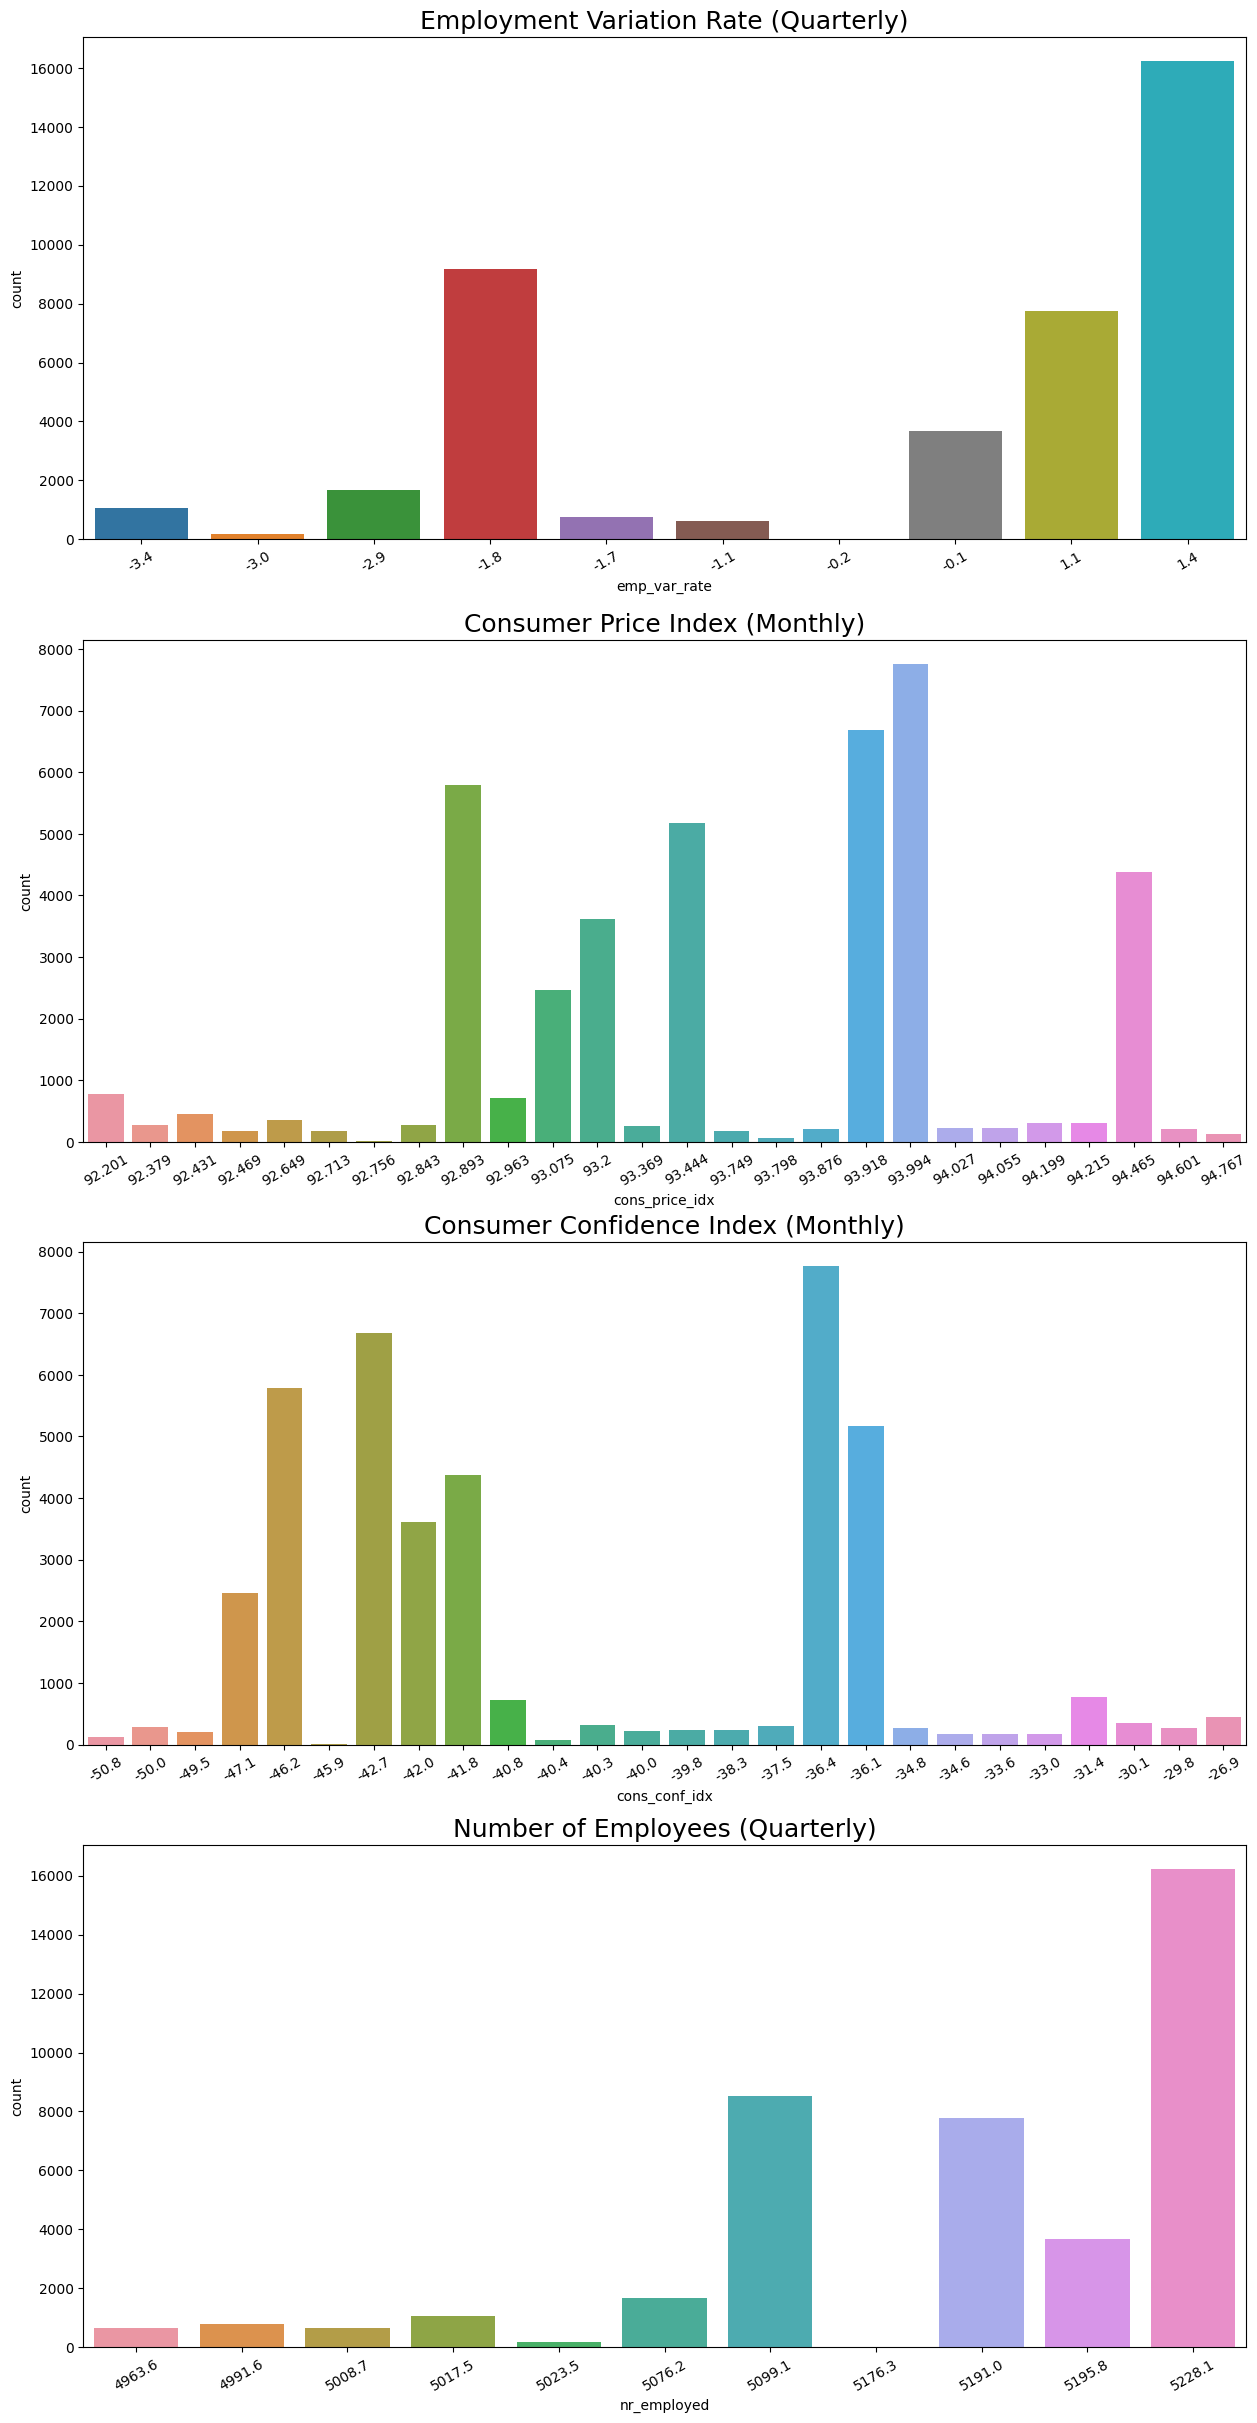

In [10]:
# Create countplot subplot for categorical columns 'emp_var_rate', 'cons_price_idx', 
# cons_conf_idx', and 'nr_employed' for visualization purpose

fig, axs = plt.subplots(4, figsize = (15, 30))

sns.countplot(x = df['emp_var_rate'], ax = axs[0])
sns.countplot(x = df['cons_price_idx'], ax = axs[1])
sns.countplot(x = df['cons_conf_idx'], ax = axs[2])
sns.countplot(x = df['nr_employed'], ax = axs[3])

axs[0].set_title('Employment Variation Rate (Quarterly)', fontsize = 18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 30)

axs[1].set_title('Consumer Price Index (Monthly)', fontsize = 18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 30)

axs[2].set_title('Consumer Confidence Index (Monthly)', fontsize = 18)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 30)

axs[3].set_title('Number of Employees (Quarterly)', fontsize = 18)
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation = 30)

# Save a copy of plot image
plt.savefig('images/Histograms subplots of Employment_Variation_CPI_CCI_Employee_Number.png')

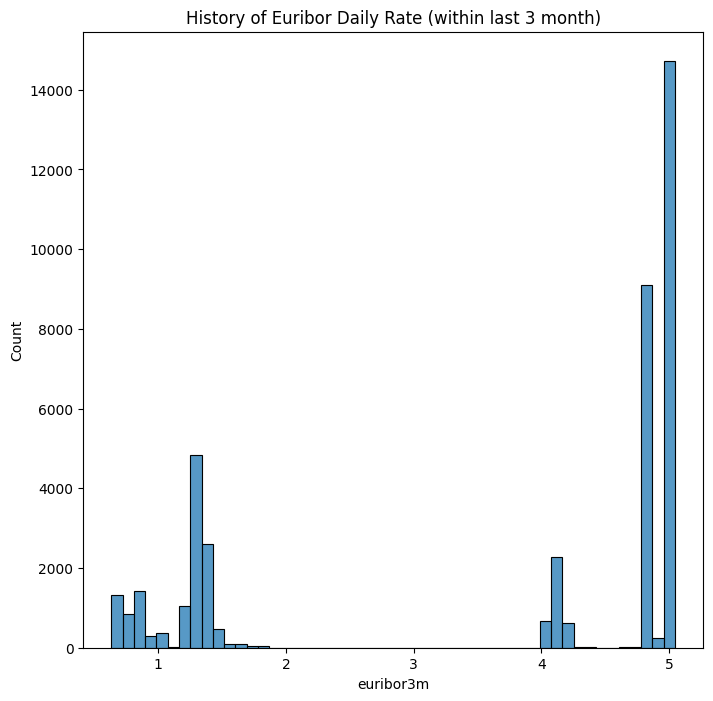

In [11]:
# Get a general idea of history of Euribor Daily Rate (for visualization purpose)

plt.figure(figsize = (8, 8))
sns.histplot(df['euribor3m'], bins = 50)
plt.title('History of Euribor Daily Rate (within last 3 month)')

# Save a copy of plot image
plt.savefig('images/Histograms plot of Euribor Daily Rate.png')

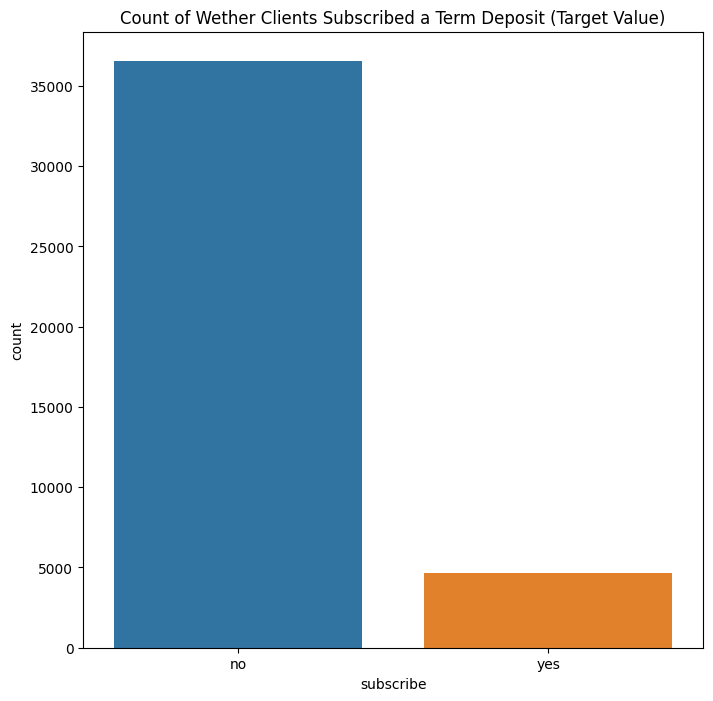

In [12]:
# Get a general idea of distribution count of Subscribed vs Non-Subscribed Clients (Target Value) (for visualization purpose)

plt.figure(figsize = (8, 8))
sns.countplot(df, x = 'subscribe')
plt.title('Count of Wether Clients Subscribed a Term Deposit (Target Value)')

# Save a copy of plot image
plt.savefig('images/Histograms plot of Wether Clients Subscribed Outcome.png')

In [13]:
# Total distribution count of Subscribed vs Non-Subscribed Clients (Target Value)

df.subscribe.value_counts()

no     36548
yes     4640
Name: subscribe, dtype: int64

In [14]:
# Probability distribution rate of Subscribed vs Non-Subscribed Clients (Target Value)

df_target_norm = df.subscribe.value_counts(normalize = True)
df_target_norm

no     0.887346
yes    0.112654
Name: subscribe, dtype: float64

### Brief Summary

- According to above plot (Count of Clients Subscribed a Term Deposit (Target Value)), the target value ('subscribe') shows the dataset is a highly **imbalanced dataset**, with rate of No (False or 0) as 88%, whereas Yes (True or 1) as 11%. This insight will impact the later decision making of model choosing based on the how well does the model handle imbalanced dataset.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [15]:
# Verify any Null value and features' data type in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

- According the to collected bank direct marketing data, the **Business Objective** here is to increase efficiency (success rate) of more productive campaign method, directed marketing campaigns, with offering attractive long-term deposit subscription, while saving the time and minimizing the cost by reducing the number of contacts that required to make.

- Thus, the goal of this project is to build different models (K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines) for this classification task (predict if a client will subscribe the deposit, not regarding which amount is retained), and compare each model's efficiency, in term of Accuracy, Precision, Recall or F1 score from the common metric of Confusion Matrix. 

# Data Preparation

- After analyzed the data, no **missing data (Null value)** in the dataset; however, due to multiples features contains value as "unknown", This insight will also impact the later decision making of model choosing based on the how well does the model handle missing values.

## Features Preprocessing  

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [16]:
# Import related libraries for Column Transform, Data Scale, PolynomialFeatures, and Pipeline

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

### Creating preprocessing Pipeline:

1. One-hot encoding categorical features
2. Scale numerical features
3. Added Polynomial features into model train and test

In [17]:
# Converted Target Value to Numerical Features

df['subscribe'] = df['subscribe'].map({'yes': 1, 'no': 0})

In [18]:
# df.subscribe.info()

In [19]:
# Define Categorical features 

category_selector = make_column_selector(dtype_include = object)

In [20]:
# Create Pipeline for standard data scale and Polynomial Feature 

numerical_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures())
])

In [21]:
# Create data transformer for data transform

transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary', handle_unknown = 'ignore'), category_selector),
    remainder = numerical_pipeline,
    #verbose_feature_names_out = False
)

### Split dataset into Train and Test. Create a baseline for all model train and test results comparison

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
# Import related libraries for dataset split into train set and test set

from sklearn.model_selection import train_test_split

**Note:**
- According to **EDA** phrase, for 'duration' feature, this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. Please see **EDA** phrase for more details.

- For 'poutcome' feature (known as outcome of the previous marketing campaign), becuase this analysis report is for analyzing current marketing campaign, so previous marketing campaign result should not be taken as consideration.

In [23]:
# Drop unnecessary feature from dataset and split dataset into train set and test set

X = df.drop(columns = ['duration', 'poutcome', 'subscribe'], axis = 1)
y = df['subscribe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Modeling

**Note:** 
- All models will run through the same process separately in order to make fairly comparison in term of 
performance.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
# Import related libraries for Baseline model build, train/test, and evaluation.

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import time

In [25]:
# Create a Baseline model for ground rule comparison, with DummyClassifier

baseline_start = time.process_time()

baseline_clf = DummyClassifier(strategy = 'stratified', random_state = 42)

# Fit and train the model
baseline_clf.fit(X_train, y_train)

y_pred_baseline = baseline_clf.predict(X_test)

baseline_end = time.process_time()
baseline_CPU_run_time = baseline_end - baseline_start

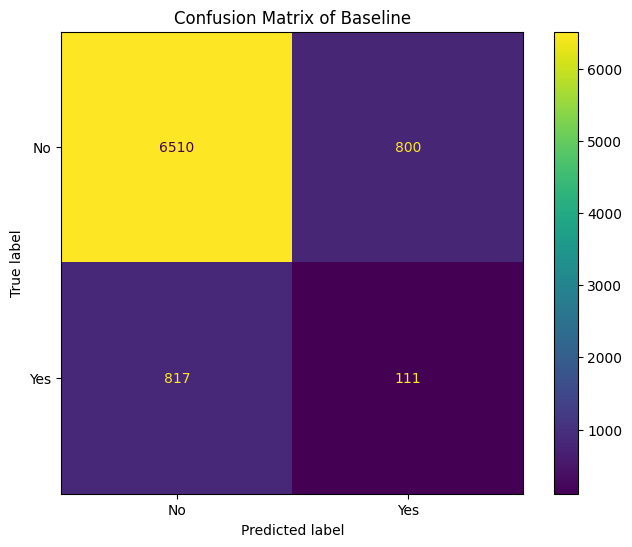

In [26]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Baseline')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Baseline.png')

In [27]:
# Generate summary report

train_accuracy_baseline = baseline_clf.score(X_train, y_train)
test_accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
test_recall_baseline = recall_score(y_test, y_pred_baseline)

print('Baseline (Dummy) Elapsed time (in Training): ', baseline_CPU_run_time)
print('Baseline (Dummy) Accuracy Score (Train):     ', train_accuracy_baseline)
print('Baseline (Dummy) Accuracy Score (Test):      ', test_accuracy_baseline)
print('Baseline (Dummy) Recall Score (Test):        ', test_recall_baseline, '\n')

report_baseline = classification_report(y_test, y_pred_baseline)

print('Baseline (Dummy) Full Clarification Report Summary: ', '\n')
print(report_baseline)

Baseline (Dummy) Elapsed time (in Training):  0.0028330000000007516
Baseline (Dummy) Accuracy Score (Train):      0.8002427921092564
Baseline (Dummy) Accuracy Score (Test):       0.803714493809177
Baseline (Dummy) Recall Score (Test):         0.11961206896551724 

Baseline (Dummy) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.12      0.12      0.12       928

    accuracy                           0.80      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.80      0.80      0.80      8238



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [28]:
# Import related libraries for Logistic Regression model build, train/test, and evaluation.

from sklearn.linear_model import LogisticRegression

In [29]:
# Build a basic Logistic Regression model with default settings

lgr_basic_start = time.process_time()

# Set up Logistic Regressio Pipeline
lgr_basic_pipe = Pipeline([
    ('transform', transformer),
    ('lgr_basic_model', LogisticRegression(max_iter = 10000))])

# Fit and train the model
lgr_basic_pipe.fit(X_train, y_train)

y_pred_lgr_basic = lgr_basic_pipe.predict(X_test)

lgr_basic_end = time.process_time()

lgr_basic_CPU_run_time = lgr_basic_end - lgr_basic_start

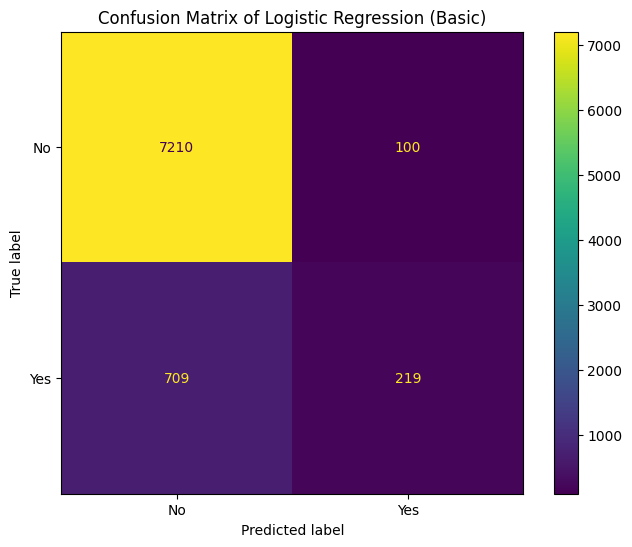

In [30]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(lgr_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Logistic Regression (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Logistic Regression (Basic).png')

In [31]:
# Generate summary report

train_accuracy_lgr_basic = lgr_basic_pipe.score(X_train, y_train)
test_accuracy_lgr_basic = accuracy_score(y_test, y_pred_lgr_basic)
test_recall_lgr_basic = recall_score(y_test, y_pred_lgr_basic)

print('Basic Logistic Regression Elapsed time (in Training): ', lgr_basic_CPU_run_time)
print('Basic Logistic Regression Accuracy Score (Train):     ', train_accuracy_lgr_basic)
print('Basic Logistic Regression Accuracy Score (Test):      ', test_accuracy_lgr_basic)
print('Basic Logistic Regression Recall Score (Test):        ', test_recall_lgr_basic, '\n')

report_lgr_basic = classification_report(y_test, y_pred_lgr_basic)

print('Basic Logistic Regression Full Clarification Report Summary: ', '\n')
print(report_lgr_basic)

Basic Logistic Regression Elapsed time (in Training):  61.47963300000001
Basic Logistic Regression Accuracy Score (Train):      0.9004248861911988
Basic Logistic Regression Accuracy Score (Test):       0.9017965525613013
Basic Logistic Regression Recall Score (Test):         0.23599137931034483 

Basic Logistic Regression Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [32]:
# Basic Logistic Regression model Accuracy report

print('Basic Logistic Regression Accuracy Score (Train): ', train_accuracy_lgr_basic)
print('Basic Logistic Regression Accuracy Score (Test):  ', test_accuracy_lgr_basic)

Basic Logistic Regression Accuracy Score (Train):  0.9004248861911988
Basic Logistic Regression Accuracy Score (Test):   0.9017965525613013


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [33]:
# Import related libraries for KNeighbors, Decision Tree, and SVM model build, train/test, and evaluation.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [34]:
# Build a basic KNeighbors model with default settings

knn_basic_start = time.process_time()

# Set up KNeighbors Pipeline
knn_basic_pipe = Pipeline([
    ('transform', transformer),
    ('knn_basic_model', KNeighborsClassifier())])

# Fit and train the model
knn_basic_pipe.fit(X_train, y_train)

y_pred_knn_basic = knn_basic_pipe.predict(X_test)

knn_basic_end = time.process_time()

knn_basic_CPU_run_time = knn_basic_end - knn_basic_start

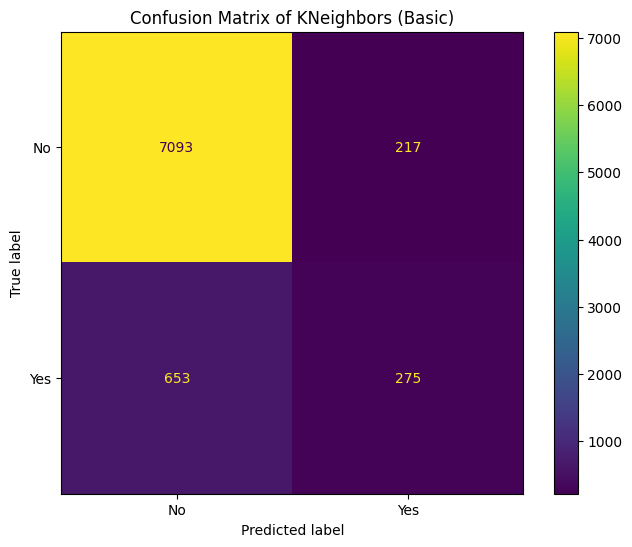

In [35]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(knn_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of KNeighbors (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of KNeighbors (Basic).png')

In [36]:
# Generate summary report

train_accuracy_knn_basic = knn_basic_pipe.score(X_train, y_train)
test_accuracy_knn_basic = accuracy_score(y_test, y_pred_knn_basic)
test_recall_knn_basic = recall_score(y_test, y_pred_knn_basic)

print('Basic KNeighbors Elapsed time (in Training): ', knn_basic_CPU_run_time)
print('Basic KNeighbors Accuracy Score (Train):     ', train_accuracy_knn_basic)
print('Basic KNeighbors Accuracy Score (Test):      ', test_accuracy_knn_basic)
print('Basic KNeighbors Recall Score (Test):        ', test_recall_knn_basic, '\n')

report_knn_basic = classification_report(y_test, y_pred_knn_basic)

print('Basic KNeighbors Full Clarification Report Summary: ', '\n')
print(report_knn_basic)

Basic KNeighbors Elapsed time (in Training):  4.547888
Basic KNeighbors Accuracy Score (Train):      0.910773899848255
Basic KNeighbors Accuracy Score (Test):       0.8943918426802622
Basic KNeighbors Recall Score (Test):         0.2963362068965517 

Basic KNeighbors Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.56      0.30      0.39       928

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.88      0.89      0.88      8238



In [37]:
# Build a basic Decision Tree model with default settings

dt_basic_start = time.process_time()

# Set up Decision Tree Pipeline
dt_basic_pipe = Pipeline([
    ('transform', transformer),
    ('dt_basic_model', DecisionTreeClassifier())])

# Fit and train the model
dt_basic_pipe.fit(X_train, y_train)

y_pred_dt_basic = dt_basic_pipe.predict(X_test)

dt_basic_end = time.process_time()

dt_basic_CPU_run_time = dt_basic_end - dt_basic_start

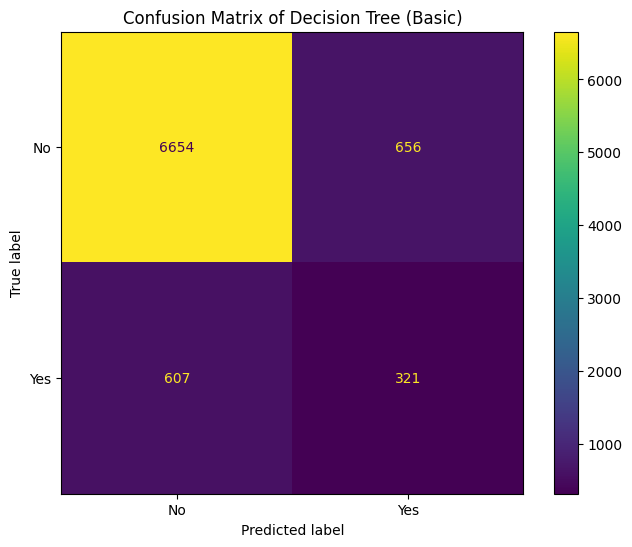

In [38]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(dt_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of Decision Tree (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of Decision Tree (Basic).png')

In [39]:
# Generate summary report

train_accuracy_dt_basic = dt_basic_pipe.score(X_train, y_train)
test_accuracy_dt_basic = accuracy_score(y_test, y_pred_dt_basic)
test_recall_dt_basic = recall_score(y_test, y_pred_dt_basic)

print('Basic Decision Tree Elapsed time (in Training): ', dt_basic_CPU_run_time)
print('Basic Decision Tree Accuracy Score (Train):     ', train_accuracy_dt_basic)
print('Basic Decision Tree Accuracy Score (Test):      ', test_accuracy_dt_basic)
print('Basic Decision Tree Recall Score (Test):        ', test_recall_dt_basic, '\n')

report_dt_basic = classification_report(y_test, y_pred_dt_basic)

print('Basic Decision Tree Full Clarification Report Summary: ', '\n')
print(report_dt_basic)

Basic Decision Tree Elapsed time (in Training):  1.0083709999999968
Basic Decision Tree Accuracy Score (Train):      0.9954172989377845
Basic Decision Tree Accuracy Score (Test):       0.8466860888565185
Basic Decision Tree Recall Score (Test):         0.3459051724137931 

Basic Decision Tree Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.33      0.35      0.34       928

    accuracy                           0.85      8238
   macro avg       0.62      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238



In [40]:
# Build a basic SVC model with default settings

svc_basic_start = time.process_time()

# Set up SVC Pipeline
svc_basic_pipe = Pipeline([
    ('transform', transformer),
    ('svc_basic_model', SVC())])

# Fit and train the model
svc_basic_pipe.fit(X_train, y_train)

y_pred_svc_basic = svc_basic_pipe.predict(X_test)

svc_basic_end = time.process_time()

svc_basic_CPU_run_time = svc_basic_end - svc_basic_start

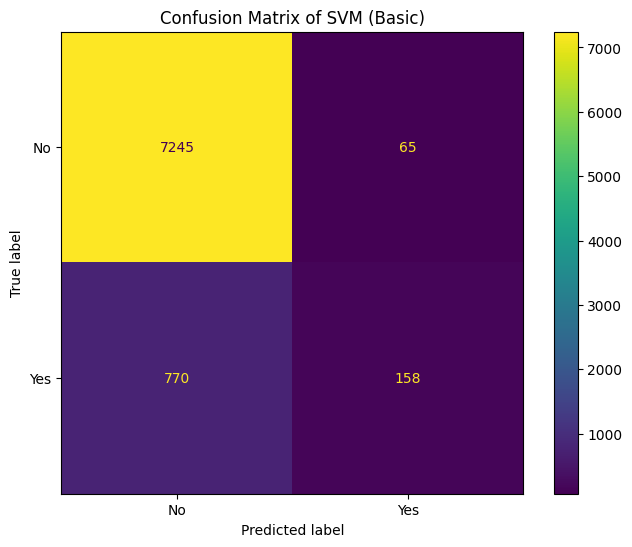

In [41]:
# Create Confusion Matrix for results display

fig, ax = plt.subplots(figsize = (8, 6))
ConfusionMatrixDisplay.from_estimator(svc_basic_pipe, X_test, y_test, ax = ax, display_labels = ['No', 'Yes'])
plt.title('Confusion Matrix of SVM (Basic)')

# Save a copy of plot image
plt.savefig('images/Confusion Matrix of SVM (Basic).png')

In [42]:
# Generate summary report

train_accuracy_svc_basic = svc_basic_pipe.score(X_train, y_train)
test_accuracy_svc_basic = accuracy_score(y_test, y_pred_svc_basic)
test_recall_svc_basic = recall_score(y_test, y_pred_svc_basic)

print('Basic SVM Elapsed time (in Training): ', svc_basic_CPU_run_time)
print('Basic SVM Accuracy Score (Train):     ', train_accuracy_svc_basic)
print('Basic SVM Accuracy Score (Test):      ', test_accuracy_svc_basic)
print('Basic SVM Recall Score (Test):        ', test_recall_svc_basic, '\n')

report_svc_basic = classification_report(y_test, y_pred_svc_basic)

print('Basic SVM Full Clarification Report Summary: ', '\n')
print(report_svc_basic)

Basic SVM Elapsed time (in Training):  84.19311
Basic SVM Accuracy Score (Train):      0.9012746585735963
Basic SVM Accuracy Score (Test):       0.8986404467103666
Basic SVM Recall Score (Test):         0.17025862068965517 

Basic SVM Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7310
           1       0.71      0.17      0.27       928

    accuracy                           0.90      8238
   macro avg       0.81      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



In [43]:
# Basic Model comparison chart

model_basic_list = ['Dummy Model (Baseline)', 'Logistic Regression', 'KNeighbors', 
                    'Decision Tree', 'Support Vector Machines (SVM)']

model_basic_train_time = [baseline_CPU_run_time, lgr_basic_CPU_run_time, knn_basic_CPU_run_time, 
                          dt_basic_CPU_run_time, svc_basic_CPU_run_time]

model_basic_train_score = [train_accuracy_baseline, train_accuracy_lgr_basic, train_accuracy_knn_basic, 
                           train_accuracy_dt_basic, train_accuracy_svc_basic]

model_basic_test_score = [test_accuracy_baseline, test_accuracy_lgr_basic, test_accuracy_knn_basic, 
                          test_accuracy_dt_basic, test_accuracy_svc_basic]

model_basic_recall_score = [test_recall_baseline, test_recall_lgr_basic, test_recall_knn_basic, 
                            test_recall_dt_basic, test_recall_svc_basic]

df_models = pd.DataFrame(list(zip(model_basic_list, model_basic_train_time, model_basic_train_score, 
                                  model_basic_test_score, model_basic_recall_score)), 
                         columns = ['Model (with Default Setting)', 'Train Time (Total CPU Execution time)',
                                    'Train Score (Accuracy)', 'Test Score (Accuracy)', 'Test Score (Recall)']
                        )
df_models

,Model (with Default Setting),Train Time (Total CPU Execution time),Train Score (Accuracy),Test Score (Accuracy),Test Score (Recall)
0,Dummy Model (Baseline),0.002833,0.800243,0.803714,0.119612
1,Logistic Regression,61.479633,0.900425,0.901797,0.235991
2,KNeighbors,4.547888,0.910774,0.894392,0.296336
3,Decision Tree,1.008371,0.995417,0.846686,0.345905
4,Support Vector Machines (SVM),84.193110,0.901275,0.898640,0.170259


### Brief Summary

- According above model comparison chart, all models (Logistic Regression, KNeighbors, Decision Tree, and Support Vector Machines(SVM)) are surpass the baseline model (DummyClassifier), with higher Train Score (Accuracy) and Test Score (Accuracy).

- However, although the high **Accuracy Score** from each model looks great, there may still be issue, such as overfitting concern. For example, Decision Tree computed to the "best score" in Train Score (Accuracy) (approximate 99%), but holds the relatively "low" Test Score (Accuracy) (approximate 85%), which indicates that this model contains overfitting issue. 

- In addition, according to the low **Recall Score** (all of them less than 0.5) from each model, another concern that raises up is that due to the current imbalanced dataset (as previously mentioned in the **EDA** phrase, as No (False or 0) as 88%, whereas Yes (True or 1) as 11%), all models (classifiers) have a high number of False negatives. Therefore, the model accuracy score calculation may not be useful, in term of basic (transitional) classification task processing, or model performance comparison and evaluation. 

- Therefore, the following step will be model improving and introducing another two more proper Performance Metric for this kind of dataset, called **ROC_AUC Score** and **F1 Score**. ROC_AUC is well-known and widely used evaluation metric that can be implemented to optimistically handle heavily imbalanced dataset only with few samples from the minority class, while F1 Score is also a great evaluation metric which can handle well uneven class distribution by providing the measure of the harmonic mean of precision and recall.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

- For Gender feature (Note: current dataset already discard this feature), according to Third iteration - variable and instance selection of the paper [Here](https://github.com/jasonszz/MLAI-2023/blob/main/Module_17_Practical_Application_3/CRISP-DM-BANK.pdf), this attribute can be discarded, since the rate of successes for Male and Female is almost the same (Male: True (11%), False (89%) vs. Female: True (12%), False (88%), which means Gender does not play an important role to distiguish the result between Male and Female clients).

- In model tuning phrase, **Grid Search** will be included, to help seach and select **Hyperparameter** for each model.

- ROC_AUC plots the False Positive Rate (FPR) versus the True Positive Rate (TPR), which allows visualizing how well the model's performance by identifying the class discrimination (in other words, distinguishing between the Postive classes and Negative classes). An ROC_AUC score is within a range from 0 to 1, as ideal model with score of 1, meaning the classifier can perfectly distinguish between all the Positive class points and the Negative class points. In general, a model with ROC_AUC score less than 0.5 indicates that the selected classifier may not work properly with the current dataset.

In [44]:
# Import related libraries for model performance tuning 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [45]:
# Implement Grid Search for Logistic Regression model (Hyperparameter) tuning

lgr_grid_start = time.process_time()

# Set up Logistic Regression Pipeline
lgr_grid_pipe = Pipeline([
    ('transform', transformer),
    ('lgr', LogisticRegression(max_iter = 10000))])

# Set up Logistic Regression Parameters
lgr_params = {'transform__remainder__poly__degree': range(1, 3),
              'lgr__penalty': ['l1', 'l2'],
              'lgr__solver': ['lbfgs', 'liblinear'],
              'lgr__C': [0.001, 0.01, 0.1, 1, 10]
             }

# Implement Grid Seach to Logistic Regression
lgr_grid = GridSearchCV(lgr_grid_pipe, param_grid = lgr_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
lgr_grid.fit(X_train, y_train)

y_pred_lgr_grid = lgr_grid.predict(X_test)
y_pred_lgr_grid_roc_auc = lgr_grid.predict_proba(X_test)[:, 1]

lgr_grid_end = time.process_time()
lgr_grid_CPU_run_time = lgr_grid_end - lgr_grid_start

/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/timetravel/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estima

In [46]:
# Summary of the model's best Hyperparameters

lgr_grid.best_params_

{'lgr__C': 10,
 'lgr__penalty': 'l1',
 'lgr__solver': 'liblinear',
 'transform__remainder__poly__degree': 2}

In [47]:
# Generate summary report

lgr_grid_f1 = f1_score(y_test, y_pred_lgr_grid)
lgr_grid_roc_auc_score = roc_auc_score(y_test, y_pred_lgr_grid_roc_auc)

print('Grid Search Logistic Regression Elapsed time (in Training): ', lgr_grid_CPU_run_time)
print('Grid Search Logistic Regression F1 Score (Test):            ', lgr_grid_f1)
print('Grid Search Logistic Regression ROC_AUC Score (Test):       ', lgr_grid_roc_auc_score, '\n')

report_lgr_grid = classification_report(y_test, y_pred_lgr_grid)

print('Grid Search Logistic Regression (with F1) Full Clarification Report Summary: ', '\n')
print(report_lgr_grid)

Grid Search Logistic Regression Elapsed time (in Training):  175.371355
Grid Search Logistic Regression F1 Score (Test):             0.3556618819776714
Grid Search Logistic Regression ROC_AUC Score (Test):        0.8054693765036087 

Grid Search Logistic Regression (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.24      0.36       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



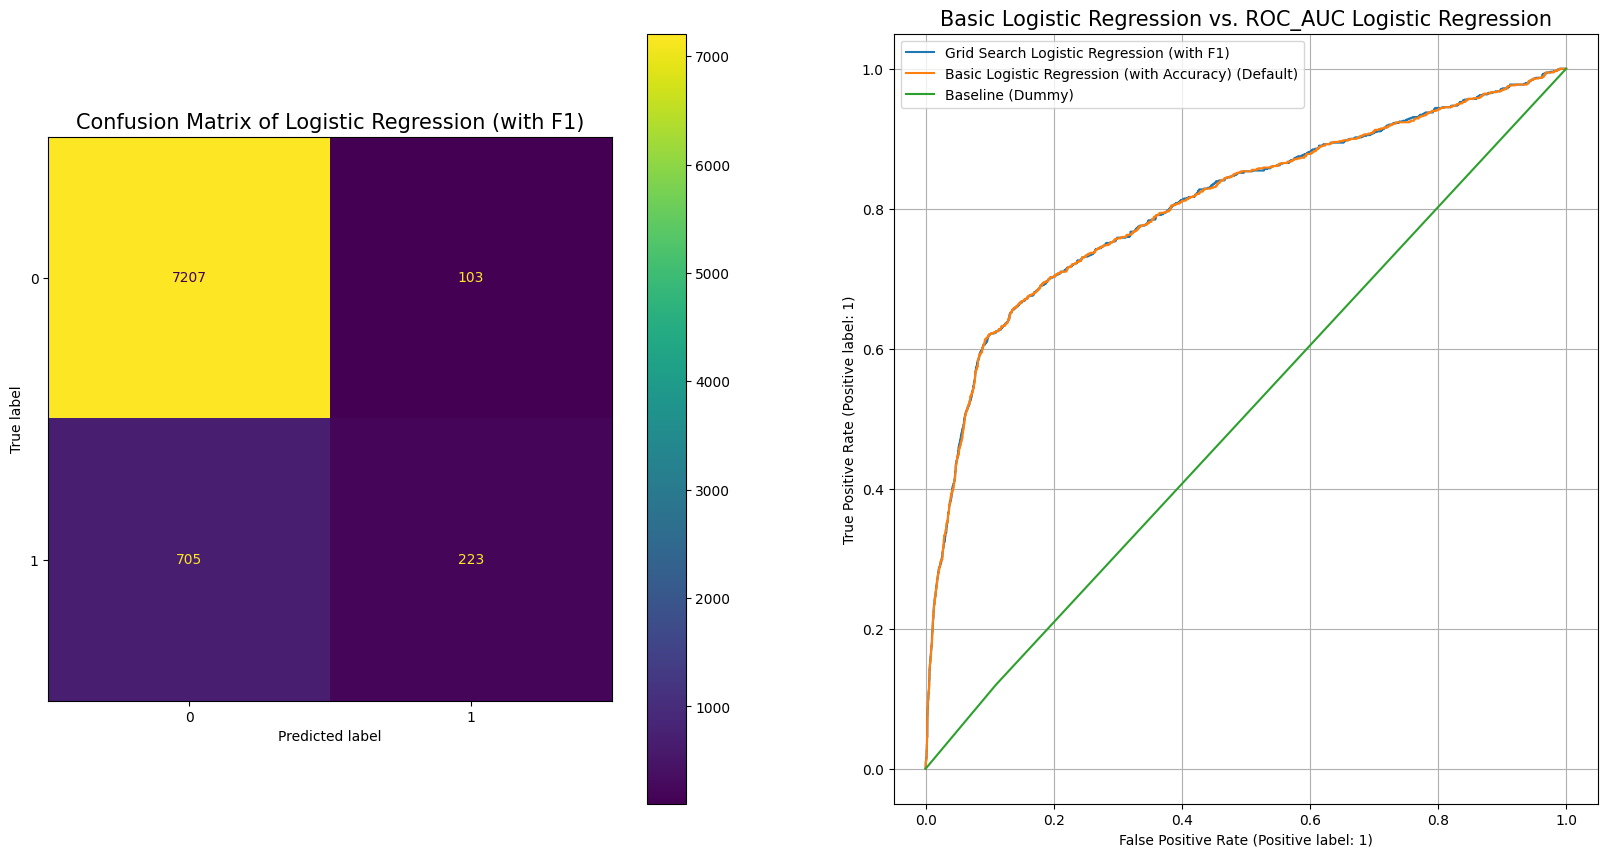

In [48]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[0])
ax[0].set_title('Confusion Matrix of Logistic Regression (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search Logistic Regression (with F1)')
RocCurveDisplay.from_estimator(lgr_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic Logistic Regression (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic Logistic Regression vs. ROC_AUC Logistic Regression', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of Logistic Regression.png')

In [49]:
# Implement Grid Search for KNeighbors model (Hyperparameter) tuning

knn_grid_start = time.process_time()

# Set up KNeighbors Pipeline
knn_grid_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])

# Set up KNeighbors Parameters
knn_params = {'knn__n_neighbors': list(range(1, 100, 2))}

# Implement Grid Seach to KNeighbors
knn_grid = GridSearchCV(knn_grid_pipe, param_grid = knn_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
knn_grid.fit(X_train, y_train)

y_pred_knn_grid = knn_grid.predict(X_test)
y_pred_knn_grid_roc_auc = knn_grid.predict_proba(X_test)[:, 1]

knn_grid_end = time.process_time()
knn_grid_CPU_run_time = knn_grid_end - knn_grid_start

In [50]:
# Summary of the model's best Hyperparameters

knn_grid.best_params_

{'knn__n_neighbors': 15}

In [51]:
# Define the best n_neighbors from KNeighbors Grid Search 

best_k_neighbor = knn_grid.best_params_['knn__n_neighbors']
best_k_neighbor

15

In [52]:
# Generate summary report

knn_grid_f1 = f1_score(y_test, y_pred_knn_grid)
knn_grid_roc_auc_score = roc_auc_score(y_test, y_pred_knn_grid_roc_auc)

print('Grid Search KNeighbors Elapsed time (in Training): ', knn_grid_CPU_run_time)
print('Grid Search KNeighbors F1 Score (Test):            ', knn_grid_f1)
print('Grid Search KNeighbors ROC_AUC Score (Test):       ', knn_grid_roc_auc_score, '\n')

report_knn_grid = classification_report(y_test, y_pred_knn_grid)

print('Grid Search KNeighbors (with F1) Full Clarification Report Summary: ', '\n')
print(report_knn_grid)

Grid Search KNeighbors Elapsed time (in Training):  13.35251199999999
Grid Search KNeighbors F1 Score (Test):             0.36210847975553856
Grid Search KNeighbors ROC_AUC Score (Test):        0.7792732705552148 

Grid Search KNeighbors (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.62      0.26      0.36       928

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



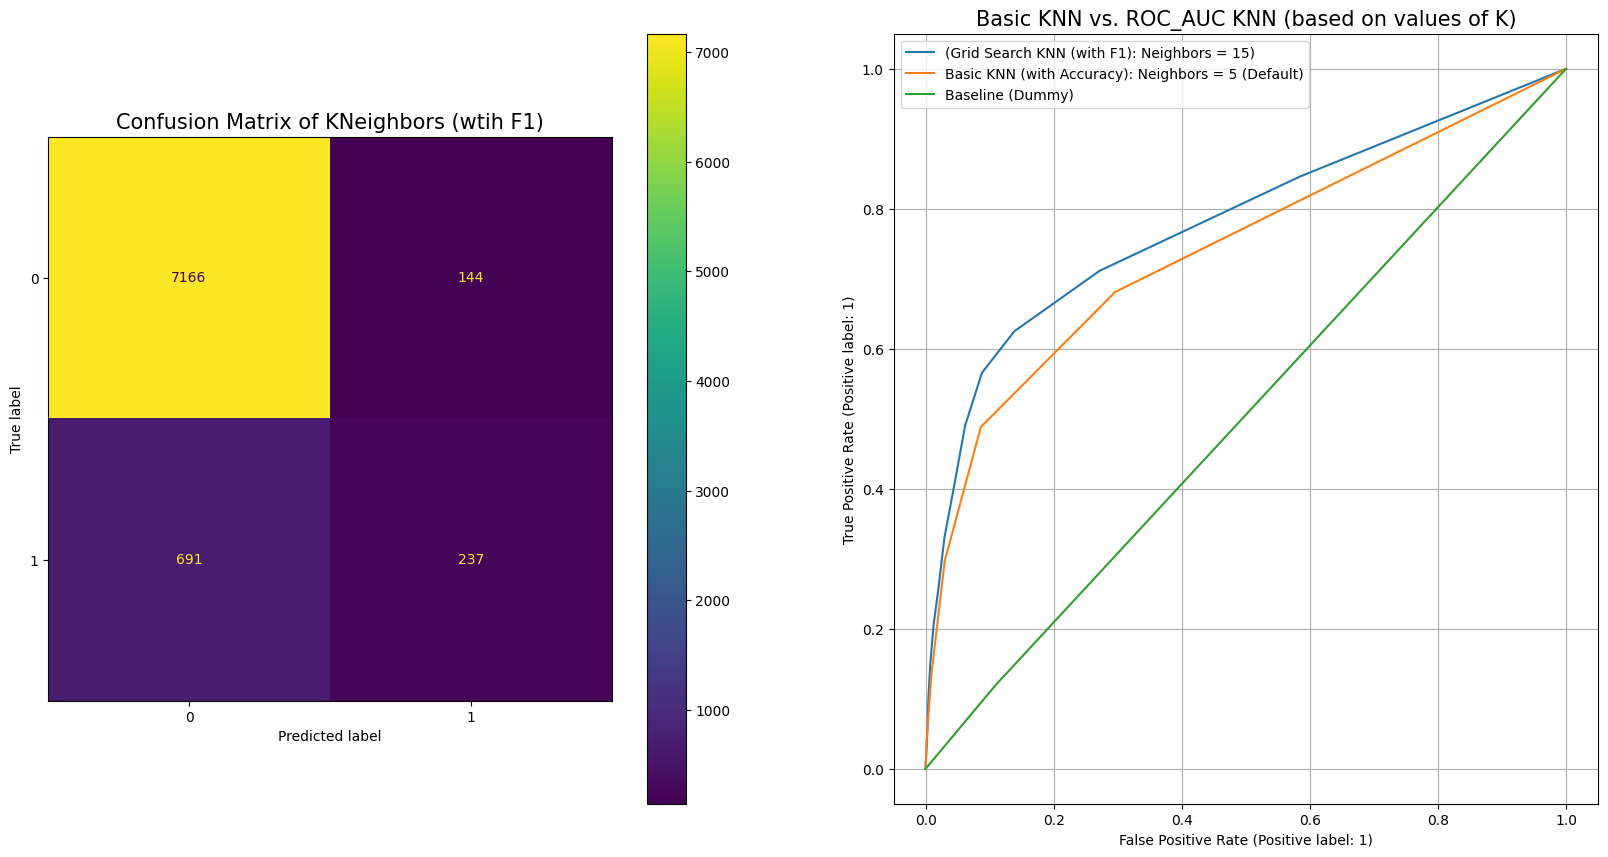

In [53]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[0])
ax[0].set_title('Confusion Matrix of KNeighbors (wtih F1)', fontsize = 15)

RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[1],
                               label = f'(Grid Search KNN (with F1): Neighbors = %0.0f)' % best_k_neighbor)
RocCurveDisplay.from_estimator(knn_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic KNN (with Accuracy): Neighbors = 5 (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic KNN vs. ROC_AUC KNN (based on values of K)', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of KNeighbors.png')

In [54]:
# Define the max depth value from Decision Tree Grid Search 

dt_basic_max_depth = dt_basic_pipe['dt_basic_model'].get_depth()
dt_basic_max_depth

45

In [55]:
# Implement Grid Search for Decision Tree model (Hyperparameter) tuning

dt_grid_start = time.process_time()

# Set up Decision Tree Pipeline
dt_grid_pipe = Pipeline([
    ('transform', transformer),
    ('dt', DecisionTreeClassifier())])

# Set up  Parameters
dt_params = {'dt__max_depth': list(range(1, 30)), # Basic DT show max depth is under 50
             'dt__min_samples_split': [2, 5, 10],
             'dt__criterion': ['gini', 'entropy'],
             'dt__min_samples_leaf': [1, 3, 6]
            }

# Implement Grid Seach to Decision Tree
dt_grid = GridSearchCV(dt_grid_pipe, param_grid = dt_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
dt_grid.fit(X_train, y_train)

y_pred_dt_grid = dt_grid.predict(X_test)
y_pred_dt_grid_roc_auc = dt_grid.predict_proba(X_test)[:, 1]

dt_grid_end = time.process_time()

dt_grid_CPU_run_time = dt_grid_end - dt_grid_start

In [56]:
# Summary of the model's best Hyperparameters

dt_grid.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 6,
 'dt__min_samples_leaf': 3,
 'dt__min_samples_split': 5}

In [57]:
# Generate summary report

dt_grid_f1 = f1_score(y_test, y_pred_dt_grid)
dt_grid_roc_auc_score = roc_auc_score(y_test, y_pred_dt_grid_roc_auc)

print('Grid Search Decision Tree Elapsed time (in Training): ', dt_grid_CPU_run_time)
print('Grid Search Decision Tree F1 Score (Test):            ', dt_grid_f1)
print('Grid Search Decision Tree ROC_AUC Score (Test):       ', dt_grid_roc_auc_score, '\n')

report_dt_grid = classification_report(y_test, y_pred_dt_grid)

print('Tuned Decision Tree (with F1) Full Clarification Report Summary: ', '\n')
print(report_dt_grid)

Grid Search Decision Tree Elapsed time (in Training):  46.40192999999999
Grid Search Decision Tree F1 Score (Test):             0.36658932714617165
Grid Search Decision Tree ROC_AUC Score (Test):        0.7986163852068494 

Tuned Decision Tree (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.65      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



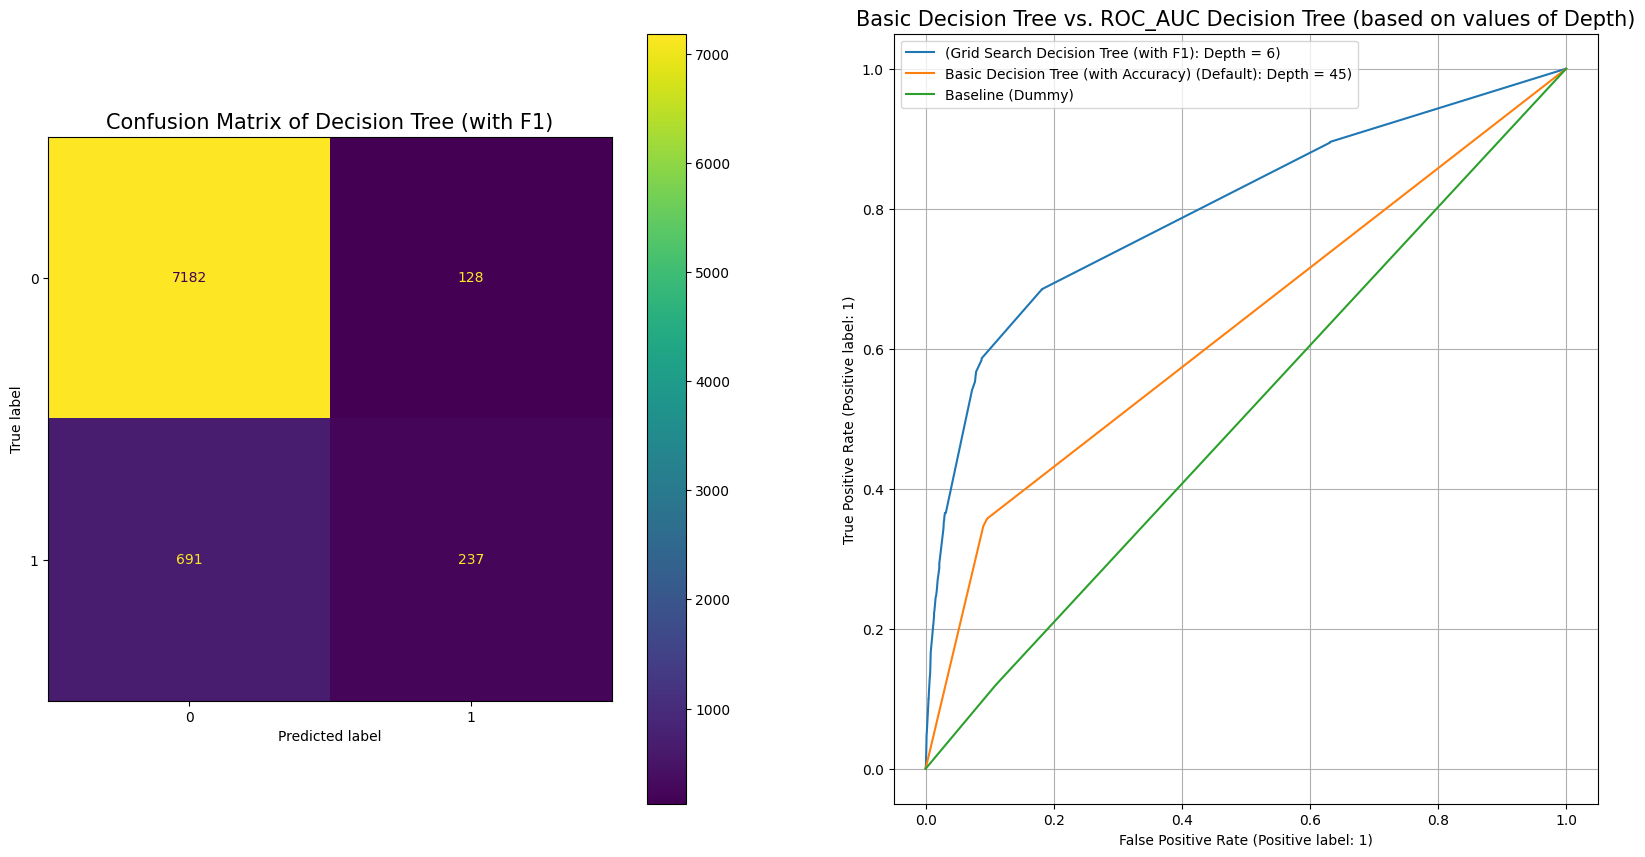

In [58]:
# Find the max depth from Grid Search

dt_grid_max_depth = dt_grid.best_estimator_.get_params()['dt__max_depth']

# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[0])
ax[0].set_title('Confusion Matrix of Decision Tree (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[1], 
                               label = f'(Grid Search Decision Tree (with F1): Depth = %0.0f)' % dt_grid_max_depth)
RocCurveDisplay.from_estimator(dt_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = f'Basic Decision Tree (with Accuracy) (Default): Depth = %0.0f)' % dt_basic_max_depth)
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic Decision Tree vs. ROC_AUC Decision Tree (based on values of Depth)', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of Decision Tree.png')

In [59]:
# Implement Grid Search for SVM model (Hyperparameter) tuning

svc_grid_start = time.process_time()

# Set up SVC Pipeline
svc_grid_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC())])

# Set up SVC Parameters
svc_params = {'svc__kernel': ['rbf', 'sigmoid'], 'svc__gamma': [0.1, 1.0, 10.0]} 
              
# Implement Grid Seach to SVM
svc_grid = GridSearchCV(svc_grid_pipe, param_grid = svc_params, scoring = 'f1', cv = 5, n_jobs = -1)

# Fit and train the model
svc_grid.fit(X_train, y_train)

y_pred_svc_grid = svc_grid.predict(X_test)
y_pred_svc_grid_roc_auc = dt_grid.predict_proba(X_test)[:, 1]

svc_grid_end = time.process_time()

svc_grid_CPU_run_time = svc_grid_end - svc_grid_start

In [60]:
# Summary of the model's best Hyperparameters

svc_grid.best_params_

{'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [61]:
# Generate summary report

svc_grid_f1 = f1_score(y_test, y_pred_svc_grid)
svc_grid_roc_auc_score = roc_auc_score(y_test, y_pred_svc_grid_roc_auc)

print('Grid Search SVM Elapsed time (in Training): ', svc_grid_CPU_run_time)
print('Grid Search SVM F1 Score (Test):            ', svc_grid_f1)
print('Grid Search SVM ROC_AUC Score (Test):       ', svc_grid_roc_auc_score, '\n')

report_svc_grid = classification_report(y_test, y_pred_svc_grid)

print('Tuned SVM (with F1) Full Clarification Report Summary: ', '\n')
print(report_svc_grid)

Grid Search SVM Elapsed time (in Training):  168.13386500000001
Grid Search SMV F1 Score (Test):             0.27327070879590093
Grid Search SMV ROC_AUC Score (Test):        0.7986163852068494 

Tuned SMV (with F1) Full Clarification Report Summary:  

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7310
           1       0.66      0.17      0.27       928

    accuracy                           0.90      8238
   macro avg       0.78      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



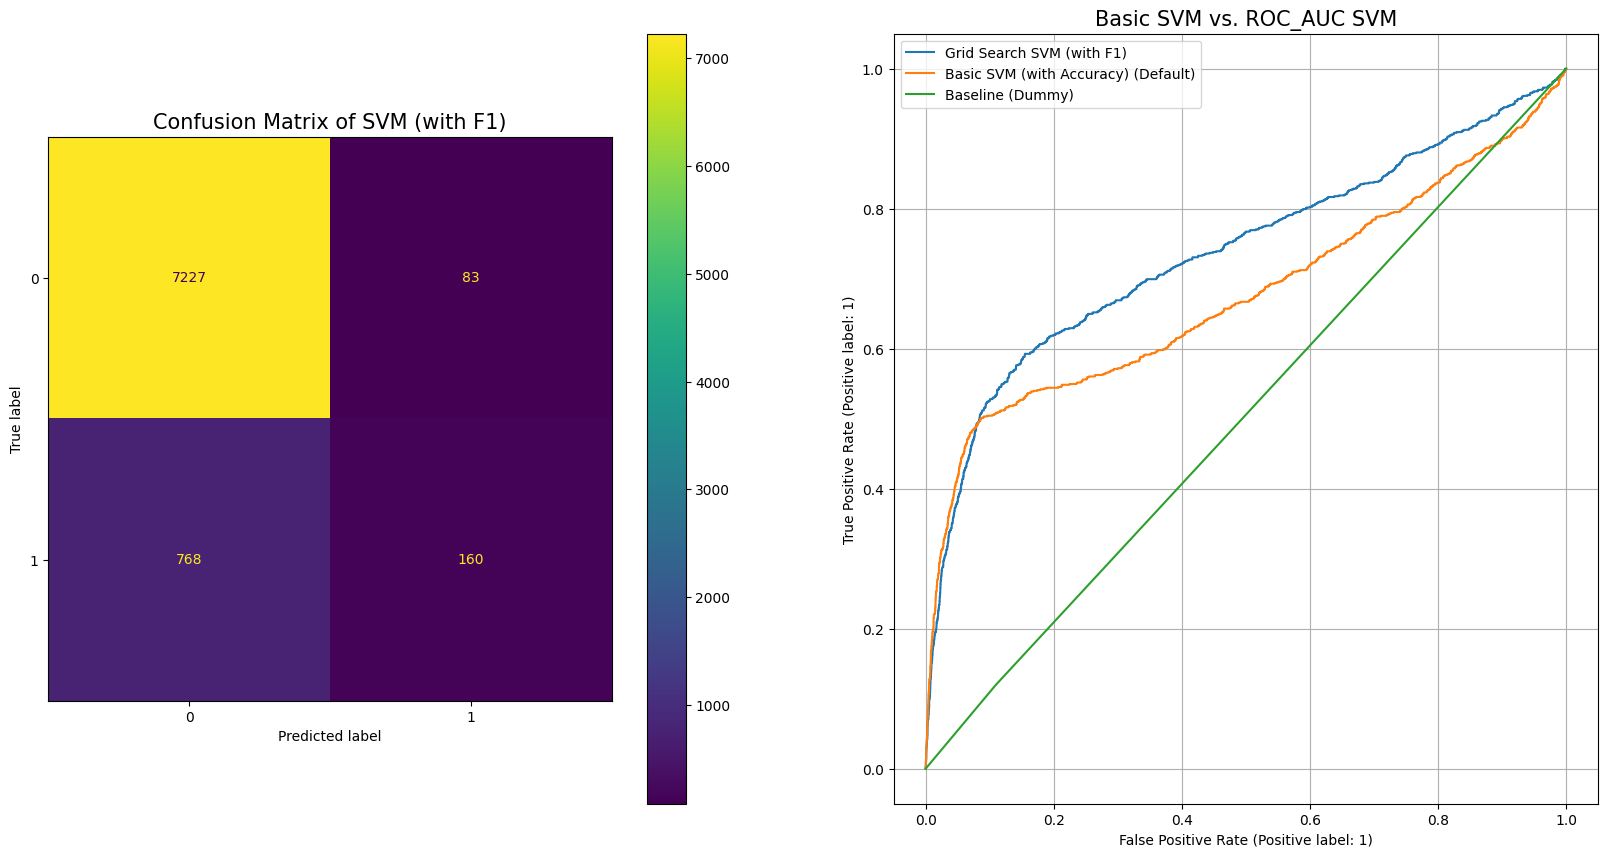

In [62]:
# Create two plots: 1) Confusion Matrix (left) and 2) ROC (right)

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ConfusionMatrixDisplay.from_estimator(svc_grid, X_test, y_test, ax = ax[0])
ax[0].set_title('Confusion Matrix of SVM (with F1)', fontsize = 15)

RocCurveDisplay.from_estimator(svc_grid, X_test, y_test, ax = ax[1], 
                               label = 'Grid Search SVM (with F1)')
RocCurveDisplay.from_estimator(svc_basic_pipe, X_test, y_test, ax = ax[1], 
                               label = 'Basic SVM (with Accuracy) (Default)')
RocCurveDisplay.from_estimator(baseline_clf, X_test, y_test, ax = ax[1], label = 'Baseline (Dummy)')
ax[1].set_title('Basic SVM vs. ROC_AUC SVM', fontsize = 15)

plt.grid()
plt.legend()

# Save a copy of plot image
plt.savefig('images/Confusion Matrix and ROC_AUC of SVM.png')

In [63]:
# Grid Search (tuned) Model comparison chart

model_grid_list = ['Logistic Regression', 'KNeighbors', 
                    'Decision Tree', 'Support Vector Machines (SVM)']

model_grid_train_time = [lgr_grid_CPU_run_time, knn_grid_CPU_run_time, 
                         dt_grid_CPU_run_time, svc_grid_CPU_run_time]

model_grid_f1_score = [lgr_grid_f1, knn_grid_f1, dt_grid_f1, svc_grid_f1]

model_grid_roc_auc_score = [lgr_grid_roc_auc_score, knn_grid_roc_auc_score, 
                            dt_grid_roc_auc_score, svc_grid_roc_auc_score]

df_models_grid = pd.DataFrame(list(zip(model_grid_list, model_grid_train_time,
                                       model_grid_f1_score, model_grid_roc_auc_score)),
                              columns = ['Model (with Grid Search)', 'Train Time (Total CPU Execution time)',
                                         'Test Score (F1)','Test Score (ROC_AUC)']
                             )
df_models_grid

,Model (with Grid Search),Train Time (Total CPU Execution time),Test Score (F1),Test Score (ROC_AUC)
0,Logistic Regression,175.371355,0.355662,0.805469
1,KNeighbors,13.352512,0.362108,0.779273
2,Decision Tree,46.401930,0.366589,0.798616
3,Support Vector Machines (SVM),168.133865,0.273271,0.798616


# Evaluation

- According the above model comparison chart, by focusing on the F1 score and ROC_AUC score, **Decision Tree** has the best overall performance (as approximate 0.37 in F1 score and approximate 0.8 in ROC_AUC score), despite it is ranked 2nd shortest elapsed time consumption (in term of computational cost). 

- Here are the hyperparameters which Grid Search method found for Decision Tree model optimisation:

In [64]:
# Summary of the model's best Hyperparameters

dt_grid.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 6,
 'dt__min_samples_leaf': 3,
 'dt__min_samples_split': 5}

In [65]:
# Get feature names out for plot Decision Tree flow chart

OneHotEncoder_columns = dt_grid.best_estimator_.named_steps['transform'].get_feature_names_out()
featureNames = []
featureNames.extend(OneHotEncoder_columns)

In [66]:
# Import related libraries for plot Decision Tree

from sklearn.tree import plot_tree, export_text
from sklearn.tree import export_graphviz
import graphviz

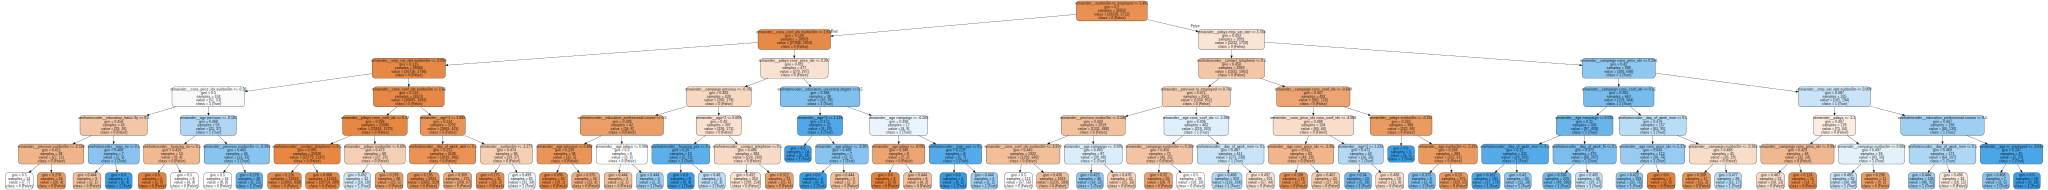

In [67]:
# Use graphviz for better figure visulization
# Note: see image in folder "images"

dot_data = export_graphviz(dt_grid.best_estimator_.get_params()['dt'], filled = True, rounded = True,
                           out_file = None, feature_names = featureNames,  
                           class_names = ['0 (False)','1 (True)'])

graph = graphviz.Source(dot_data, format = "png")

# Save a copy of plot image
graph.render('images/Grid_Search_Decision_Tree_graphivz')

# Dispaly Decision Tree plot
graph

In [68]:
# Import related libraries for investigate permutation importance

from sklearn.inspection import permutation_importance

In [69]:
# User permutation_importance to investigate the importance of different features to the best model

result = permutation_importance(dt_grid.best_estimator_, X_test, y_test, n_repeats = 10, random_state = 42)

# Create a DataFrame to display the results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_mean': result.importances_mean,
    'Importance_std': result.importances_std
})

# Sort the DataFrame by importance_mean in descending order
importance_df = importance_df.sort_values(by = 'Importance_mean', ascending = False)
importance_df

,Feature,Importance_mean,Importance_std
13,emp_var_rate,0.137715,0.002420
16,euribor3m,0.077118,0.001916
17,nr_employed,0.013292,0.001223
11,pdays,0.012151,0.000733
14,cons_price_idx,0.002076,0.000446
7,contact,0.001930,0.000914
12,previous,0.001384,0.000541
0,age,0.001056,0.000461
15,cons_conf_idx,0.001008,0.000501
10,campaign,0.000486,0.000518


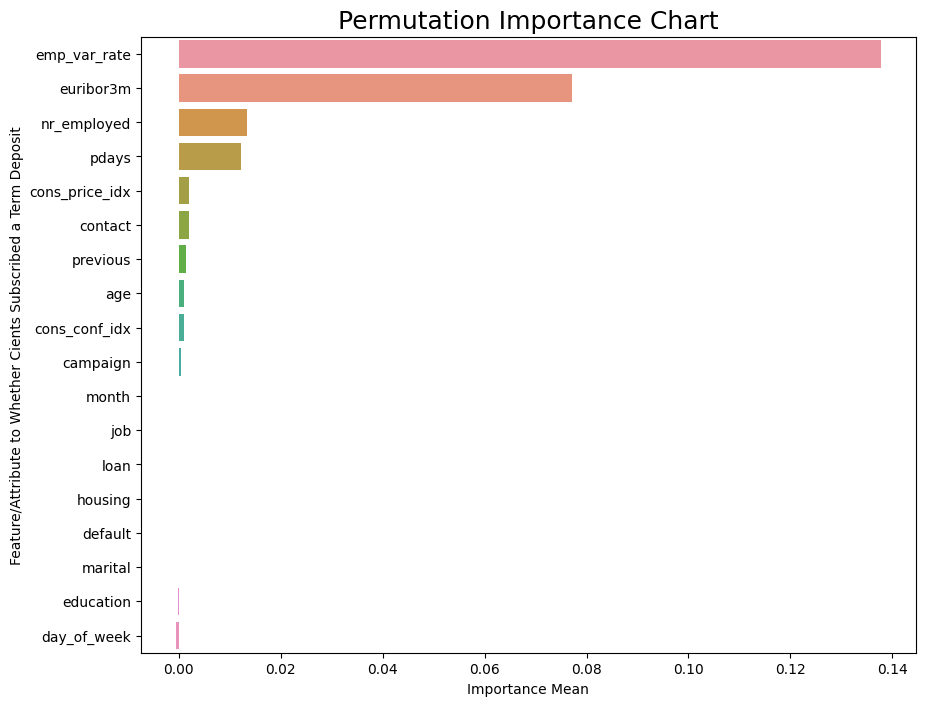

In [71]:
# Plot important features based on permutation importance

plt.figure(figsize = (10, 8))
sns.barplot(importance_df, x = 'Importance_mean', y = 'Feature')

plt.xlabel('Importance Mean')
plt.ylabel('Feature/Attribute to Whether Cients Subscribed a Term Deposit')
plt.title('Permutation Importance Chart', fontsize = 18)

# Save a copy of plot image
plt.savefig('images/Plot_important_features_from_permutation_importance.png')

# Conclusion

Due to the provided dataset contain **high imbalanced data**, we cannot rely on a performance metric that merely focus on Accuracy score, when comes to model performance comparison. Although all of our built models (Logistic Regression vs KNeighbors vs Decision Tree vs SVM) have their limitation, their performances all surpassed the baseline model (DummyClassifier). 

By tuning our models with Grid Search (to compute the best Hyperparameter) and utilizing the other two more proper Performance Metrics (**F1 score** and **ROC_AUC score**), we conclude that Decision Tree has the best overall performance, in term of best "accuracy" (best F1 score and ROC_AUC score) and relatively less **computation cost** (2nd shortest elapsed time consumption).

With our selected **best model (Decision Tree)**, we then utilize one of its advantages, Tree Visualization, to help easy understand the interpret the decision split results. In addition, with the help of Grid Search tuning, our best model also demonstrates its ability of handling missing values (our dataset also contains some portion of "Unknown" data). 

Furthermore, with the help of permutation importance feature, we are able to compute and visualize the importance of features that may directly influence the Target Value (Wether Clients Subscribed a Term Deposit). Here are the top 3 features that may impact the decision making to our target value.

1. emp.var.rate
2. euribor3m
3. nr_employed

However, due the high percentage of imbalanced data, despite the effort of building our best model, the outcome may seem to be lack of persuasiveness. 

## Next steps and recommendations

In order to achieve better performance and more meaningful result, here are some recommend steps:

- Gather more data, for example, informations like clients' income vs spending
- Data cleaning, such as identify "Unknown" data point
- Utilize other technique, such as SMOTE, XGBoost, and Random Forest to handle class imbalance concern
- Introduce Time Series analysis for feature group (like Day.of.Week) 